# 1. Poner título a los datasets, eliminar duplicados y guardar en excel

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from shutil import rmtree
from sklearn.model_selection import train_test_split

In [410]:
mainpath = "../datasets-tfg"
filename = "conferencias con nombres"
fullpath = os.path.join(mainpath, filename)

lista = os.listdir(fullpath) #Obtenemos la lista de todos los archivos de la carpeta "Conferencias con nombres"

In [412]:
#Vamos a crear la carpeta conferencias v1, donde vamos a guardar todas las conferencias prepreprocesadas, con sus respectivas gráficas
mainpath = "../datasets-tfg"
filename = "conferencias v1"
fullpath = os.path.join(mainpath, filename)

#Comprobamos si la carpeta ya existe
fileExists = os.path.isdir('../datasets-tfg/conferencias v1')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath) #creamos una carpeta, donde posteriormente almacenaremos los csv de las conferencias una vez procesados

In [413]:
#Creamos la carpeta entrenamiento
mainpath = "../datasets-tfg/conferencias v1"
fullpath = os.path.join(mainpath, "entrenamiento")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1"

#Creamos la carpeta test
fullpath = os.path.join(mainpath, "test")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

In [414]:
#Vamos a crear la carpeta csv, donde vamos a guardar todos los csv de las conferencias una vez preprocesadas
mainpath1 = "../datasets-tfg/conferencias v1/entrenamiento"
mainpath2 = "../datasets-tfg/conferencias v1/test"

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath1, "csv completo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/csv completo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath1, "csv cortado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/csv cortado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas, donde vamos a guardar todas las imagenes de las graficas de las conferencias una vez preprocesadas
fullpath = os.path.join(mainpath1, "graficas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/graficas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)


#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath2, "csv completo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/csv completo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Comprobamos si la carpeta ya existe
fullpath = os.path.join(mainpath2, "csv cortado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/csv cortado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas, donde vamos a guardar todas las imagenes de las graficas de las conferencias una vez preprocesadas
fullpath = os.path.join(mainpath2, "graficas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/graficas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

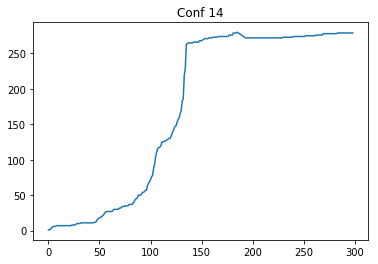

In [415]:
filepath = "../datasets-tfg/conferencias con nombres/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/csv completo/"
filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/csv cortado/"
filepath3 = "../datasets-tfg/conferencias v1/entrenamiento/graficas/"
filepath4 = "../datasets-tfg/conferencias v1/test/csv completo/"
filepath5 = "../datasets-tfg/conferencias v1/test/csv cortado/"
filepath6 = "../datasets-tfg/conferencias v1/test/graficas/"

#Estos son los títulos que queremos para cada columna
conf1_cols=["Fecha", "Enviados", "T1", "T2", "T3", "T4", "T5", "T6", "T7", "T8", "T9", "T10", "Aceptados", "Porcentaje aceptados","Rechazados",
            "Borrados","Registrados","Sin version final","Desconocido"]

#Obtenemos la lista de todos los archivos de la carpeta "conferencias con nombres"
lista1 = os.listdir("../datasets-tfg/conferencias con nombres")


#Dividimos los datasets en entrenamiento y testeo usando la regla de pareto
data_train, data_test = train_test_split(lista1, test_size=0.2)

for i in range (0,len(data_train)):
    filename = str(data_train[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file, header=None, names=conf1_cols)
    temp_data = temp_data.drop_duplicates()
    temp_data = temp_data.dropna()
    temp_data = temp_data.reset_index(drop=True)
    temp_data.to_csv(filepath1 + 'Conf' + str(i) + '.csv', index=False)
    tail = temp_data[temp_data["Enviados"]>=int(temp_data.tail(1)["Enviados"])].index
    tail = np.delete(tail, 0)
    temp_data = temp_data.drop(tail)
    temp_data.to_csv(filepath2 + 'Conf' + str(i) + '.csv', index=False)
    
    %matplotlib inline
    plt.plot(temp_data["Enviados"])
    plt.title("Conf " + str(i)) 
    
    plt.savefig(filepath3 + "Grafica Conf " + str(i) + " (" + str(data_train[i]) +  ").jpg")
    
    ult_fila = temp_data.tail(1)
    
    
    if i == 0:
        data = ult_fila
    else:
        data = pd.concat([data, ult_fila], axis=0, sort=False)
    
for i in range (0,len(data_test)):
    filename = str(data_test[i])
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file, header=None, names=conf1_cols)
    temp_data = temp_data.drop_duplicates()
    temp_data = temp_data.dropna()
    temp_data = temp_data.reset_index(drop=True)
    temp_data.to_csv(filepath4 + 'Conf' + str(i) + '.csv', index=False)
    tail = temp_data[temp_data["Enviados"]>=int(temp_data.tail(1)["Enviados"])].index
    tail = np.delete(tail, 0)
    temp_data = temp_data.drop(tail)
    temp_data.to_csv(filepath5 + 'Conf' + str(i) + '.csv', index=False)
    
    %matplotlib inline
    plt.plot(temp_data["Enviados"])
    plt.title("Conf " + str(i)) 
    
    plt.savefig(filepath6 + "Grafica Conf " + str(i) + " (" + str(data_train[i]) +  ").jpg")
    
    ult_fila = temp_data.tail(1)
    
    
    if i == 0:
        data = ult_fila
    else:
        data = pd.concat([data, ult_fila], axis=0, sort=False)
    
    

# 2. Recorte automático de curvas por escalones y guardado en fichero

In [416]:
####ENTRENAMIENTO####
#Creamos la carpeta Curvas
mainpath = "../datasets-tfg/conferencias v1/entrenamiento"
fullpath = os.path.join(mainpath, "curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta picos para division 
fullpath = os.path.join(mainpath, "picos para division")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/picos para division')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta conf dividida 
fullpath = os.path.join(mainpath, "conf dividida")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/conf dividida')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
####TEST####
#Creamos la carpeta Curvas
mainpath = "../datasets-tfg/conferencias v1/test"
fullpath = os.path.join(mainpath, "curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
mainpath = "../datasets-tfg/conferencias v1/test/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta picos para division 
fullpath = os.path.join(mainpath, "picos para division")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/picos para division')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta conf dividida 
fullpath = os.path.join(mainpath, "conf dividida")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/conf dividida')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

In [417]:
from scipy.signal import find_peaks

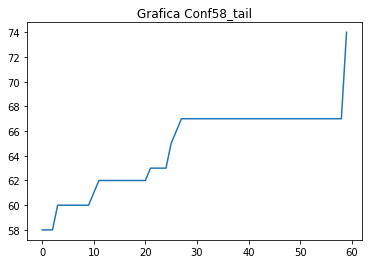

In [418]:
####Curvas entrenamiento#####

filepath = "../datasets-tfg/conferencias v1/entrenamiento/csv completo/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas/"
filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas/"
filepath3= "../datasets-tfg/conferencias v1/entrenamiento/curvas/picos para division/"
filepath4= "../datasets-tfg/conferencias v1/entrenamiento/curvas/conf dividida/"
filepath5= "../datasets-tfg/conferencias v1/entrenamiento/curvas/"

#declaramos un dataframe vacio
mapa = pd.DataFrame(columns=('NombreCurva', 'Escalon', 'DiasTotales', 'EnviadosTotales'))

lista1 = os.listdir("../datasets-tfg/conferencias v1/entrenamiento/csv completo")

b = len(lista1)
for i in range (0, b): #En el in range no entra el último
#for i in range (36, 37):   
    
    filename = "Conf" + str(i) + ".csv"
    file = filepath + filename
    
    #Df completo
    df = pd.read_csv(file)  
    #df = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/csv cortado/" + filename)
    env_lista = df["Enviados"].tolist()    
    env_vect = np.asarray(env_lista)
    m = len(env_vect)
    
    #Df cortado
    df1 = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/csv cortado/" + filename)
    env_lista1 = df1["Enviados"].tolist()    
    env_vect1 = np.asarray(env_lista1)
    h = len(env_vect1)
    
    #Calculamos la derivada en cada punto del df completo
    deriv = env_vect[1]-env_vect[0]   
    deriv = [deriv]
    
    for j in range (2, m):
        d = env_vect[j]-env_vect[j-1]
        deriv.append(d)
    
    #Pasamos la derivada a de formato lista a vector    
    deriv1 = np.asarray(deriv)    
    
   
    #Hacemos lo mismo para el df cortado 
    #Calculamos la derivada en cada punto del df cortado
    deriv_cortada = env_vect1[1]-env_vect1[0]   
    deriv_cortada = [deriv_cortada]
    
    for j in range (2, h):
        d = env_vect1[j]-env_vect1[j-1]
        deriv_cortada.append(d)

    #Pasamos la derivada a de formato lista a vector    
    deriv1_cortada = np.asarray(deriv_cortada)    
         
    p = np.amax(deriv1) / 6
    
    #Busco los máximos de la derivada
    n = len(deriv1)
    x = np.array(range(0,n,1))
    peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
    
    if (len(peaks)==0 or np.all(peaks==0)):
        p = 2.5
        peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
    
    if df["Enviados"][peaks[len(peaks)-1]]>=0.9*df["Enviados"][len(df)-1]:
        peaks = np.delete(peaks, len(peaks)-1)
        
    #for k in range (1,2):
    for k in range (0, len(peaks)):
        if k==(len(peaks)-1) and (peaks[k]+2)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]])]
        elif k==(len(peaks)-1) and (peaks[k]+3)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1])]
        elif k==(len(peaks)-1) and (peaks[k]+4)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2])]
        elif k==(len(peaks)-1) and (peaks[k]+5)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3])]
        elif k==(len(peaks)-1) and (peaks[k]+6)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4])]
        else:
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4]), abs(deriv1[peaks[k]+6]-deriv1[peaks[k]+5])]
        
        for a in range (0, len(deriv2)):
            if deriv2[a]>(max(deriv2)/3):
                peaks[k] = peaks[k]+a
                
        #if len(deriv2)>1:
         #   if max(deriv2)==deriv2[1]:
           #     peaks[k] = peaks[k]+1
           # elif len(deriv2)>2 and max(deriv2)==deriv2[2]:
           #     peaks[k] = peaks[k]+2
           # elif len(deriv2)>3 and max(deriv2)==deriv2[3]:
           #     peaks[k] = peaks[k]+3
           # elif len(deriv2)>4 and max(deriv2)==deriv2[4]:
           #     peaks[k] = peaks[k]+4   
           # elif len(deriv2)>5 and max(deriv2)==deriv2[5]:
           #     peaks[k] = peaks[k]+5
            
    %matplotlib inline
    r = len(deriv1_cortada)
    x_cortada = np.array(range(0,r,1))
    plt.plot(x_cortada, deriv1_cortada)
    plt.plot(peaks, deriv1[peaks], "x")
    plt.title('Grafica Conf' + str(i)) 
    plt.savefig(filepath3 + "Conf " + str(i) + '_peaks' + ".jpg")
    
    %matplotlib inline
    plt.plot(env_vect1)
    plt.plot(peaks+1, env_vect[peaks+1], "x")
    plt.title("Conf " + str(i)) 
    plt.savefig(filepath4 + "Conf " + str(i) + '_division' + ".jpg")
    
    #Dividimos la curva en escalones
    if len(peaks) <= 5:
        n = len(peaks)
    else:
        n = 5
    
    error = 1
    
    #for l in range (2,3):
    for l in range (0,n):
        if n==1:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                if(len(tail)!=0):
                    tail = np.delete(tail, 0)
                    tail = np.delete(tail, 0)
                    curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        elif l==0:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
        
        elif l==n-1:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                if(len(tail)!=0):
                    tail = np.delete(tail, 0)
                    tail = np.delete(tail, 0)
                    curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        else:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
mapa.to_csv(filepath5 + 'Mapa.csv', index=False)

In [419]:
peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=9)
peaks

array([ 12,  33,  51, 110], dtype=int64)

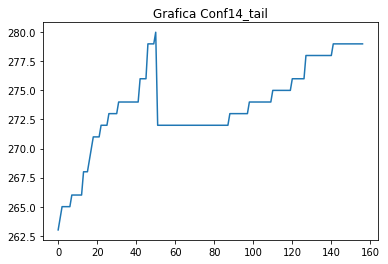

In [420]:
####Curvas test#####

filepath = "../datasets-tfg/conferencias v1/test/csv completo/"
filepath1 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas/"
filepath2 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas/"
filepath3= "../datasets-tfg/conferencias v1/test/curvas/picos para division/"
filepath4= "../datasets-tfg/conferencias v1/test/curvas/conf dividida/"
filepath5= "../datasets-tfg/conferencias v1/test/curvas/"


#declaramos un dataframe vacio
mapa = pd.DataFrame(columns=('NombreCurva', 'Escalon', 'DiasTotales', 'EnviadosTotales'))
mapa2 = pd.DataFrame(columns=('Nombre conferencia', 'Numero escalones', 'Numero Enviados'))

lista1 = os.listdir("../datasets-tfg/conferencias v1/test/csv completo")

b = len(lista1)
for i in range (0, b): #En el in range no entra el último
    
    filename = "Conf" + str(i) + ".csv"
    file = filepath + filename
    
    #Df completo
    df = pd.read_csv(file)             
    env_lista = df["Enviados"].tolist()    
    env_vect = np.asarray(env_lista)
    m = len(env_vect)
    
    #Df cortado
    df1 = pd.read_csv("../datasets-tfg/conferencias v1/test/csv cortado/" + filename)
    env_lista1 = df1["Enviados"].tolist()    
    env_vect1 = np.asarray(env_lista1)
    h = len(env_vect1)
    
    #Calculamos la derivada en cada punto del df completo
    deriv = env_vect[1]-env_vect[0]   
    deriv = [deriv]
    
    for j in range (2, m):
        d = env_vect[j]-env_vect[j-1]
        deriv.append(d)
    
    #Pasamos la derivada a de formato lista a vector    
    deriv1 = np.asarray(deriv)    
    
    #Hacemos lo mismo para el df cortado 
    #Calculamos la derivada en cada punto del df cortado
    deriv_cortada = env_vect1[1]-env_vect1[0]   
    deriv_cortada = [deriv_cortada]
    
    for j in range (2, h):
        d = env_vect1[j]-env_vect1[j-1]
        deriv_cortada.append(d)

    #Pasamos la derivada a de formato lista a vector    
    deriv1_cortada = np.asarray(deriv_cortada)    

        
    p = np.amax(deriv1) / 6
    
    #Busco los máximos de la derivada
    n = len(deriv1)
    x = np.array(range(0,n,1))
    peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
    
    if (len(peaks)==0 or np.all(peaks==0)):
        p = 2.5
        peaks, _ = find_peaks(deriv1, height=p, threshold=None, distance=16)
        
    if df["Enviados"][peaks[len(peaks)-1]]>=0.9*df["Enviados"][len(df)-1]:
        peaks = np.delete(peaks, len(peaks)-1)
    
    #for k in range (1,2):
    for k in range (0, len(peaks)):
        if k==(len(peaks)-1) and (peaks[k]+2)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]])]
        elif k==(len(peaks)-1) and (peaks[k]+3)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1])]
        elif k==(len(peaks)-1) and (peaks[k]+4)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2])]
        elif k==(len(peaks)-1) and (peaks[k]+5)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3])]
        elif k==(len(peaks)-1) and (peaks[k]+6)>=len(deriv1):
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4])]
        else:
            deriv2 = [abs(deriv1[peaks[k]+1]-deriv1[peaks[k]]), abs(deriv1[peaks[k]+2]-deriv1[peaks[k]+1]), abs(deriv1[peaks[k]+3]-deriv1[peaks[k]+2]),abs(deriv1[peaks[k]+4]-deriv1[peaks[k]+3]), abs(deriv1[peaks[k]+5]-deriv1[peaks[k]+4]), abs(deriv1[peaks[k]+6]-deriv1[peaks[k]+5])]
        
        for a in range (0, len(deriv2)):
            if deriv2[a]>(max(deriv2)/3):
                peaks[k] = peaks[k]+a
                
    
    %matplotlib inline
    r = len(deriv1_cortada)
    x_cortada = np.array(range(0,r,1))
    plt.plot(x_cortada, deriv1_cortada)
    plt.plot(peaks, deriv1[peaks], "x")
    plt.title('Grafica Conf' + str(i)) 
    plt.savefig(filepath3 + "Conf " + str(i) + '_peaks' + ".jpg")
    
    
    %matplotlib inline
    plt.plot(env_vect1)
    plt.plot(peaks+1, env_vect[peaks+1], "x")
    plt.title("Conf " + str(i)) 
    plt.savefig(filepath4 + "Conf " + str(i) + '_division' + ".jpg")
    
    #Dividimos la curva en escalones
    if len(peaks)<=5:
        n = len(peaks)
    else:
        n = 5

    error = 1

    for l in range (0,n):
        if n==1:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                tail = np.delete(tail, 0)
                tail = np.delete(tail, 0)
                curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        elif l==0:
            curva1 = df.drop(df[df.index>peaks[l]+error].index)
            curva1.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva1), curva1["Enviados"][len(curva1)-1]] 
            
            %matplotlib inline
            plt.plot(curva1["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
        
        elif l==n-1:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
            curva3 = df.drop(df[df.index<peaks[l]+error].index)
            curva3 = curva3.reset_index(drop=True)
            tail = curva3[curva3["Enviados"]>=int(curva3.tail(1)["Enviados"])].index
            tail = np.delete(tail, 0)
            if len(curva3.drop(tail))!=1:
                curva3 = curva3.drop(tail)
            else:
                tail = np.delete(tail, 0)
                tail = np.delete(tail, 0)
                curva3 = curva3.drop(tail)
            curva3 = curva3.reset_index(drop=True)
            curva3.to_csv(filepath1 + 'Conf' + str(i) + '_tail' + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_tail', -1, len(curva3), curva3["Enviados"][len(curva3)-1]-curva3["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva3["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_tail') 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_tail' + ".jpg")
            
        else:
            curva2 = df.drop(df[df.index>peaks[l]+error].index)
            curva2 = curva2.drop(curva2[curva2.index<peaks[l-1]+error+3].index)
            curva2 = curva2.reset_index(drop=True)
            curva2.to_csv(filepath1 + 'Conf' + str(i) + '_C' + str(l+1) + '.csv', index=False)
            mapa.loc[len(mapa)]=['Conf' + str(i) + '_C' + str(l+1), l+1, len(curva2), curva2["Enviados"][len(curva2)-1]-curva2["Enviados"][0]] 
            
            %matplotlib inline
            plt.plot(curva2["Enviados"])
            plt.title('Grafica Conf' + str(i) + '_C' + str(l+1)) 
            plt.savefig(filepath2 + "Grafica Conf " + str(i) + '_C' + str(l+1) + ".jpg")
            
    mapa2.loc[len(mapa2)] = ['Conf' + str(i), n+1, df["Enviados"][len(df)-1]]
            
mapa.to_csv(filepath5 + 'Mapa.csv', index=False)
mapa2.to_csv(filepath5 + 'Mapa conferencias.csv', index=False)

# 3. Escalado de las curvas

In [421]:
### Curvas entrenamiento ###

mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)


### Curvas test ###

mainpath = "../datasets-tfg/conferencias v1/test/curvas"

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta csv curvas
fullpath = os.path.join(mainpath, "csv curvas escaladas (eje x)")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)
    
#Creamos la carpeta graficas curvas 
fullpath = os.path.join(mainpath, "graficas curvas escaladas (eje x)")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas (eje x)')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

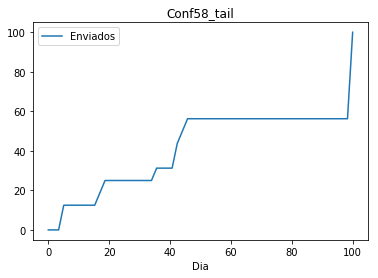

In [422]:
### Curvas entrenamiento ####

filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"


mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")   
n = len(mapa_curv) #número de archivos en la carpeta

for i in range (0, n): #En el in range no entra el último
    filename = str(mapa_curv["NombreCurva"][i]) + ".csv"
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    
    if mapa_curv["Escalon"][i]==1:
        drop = temp_data[temp_data["Enviados"]<=int(temp_data["Enviados"][len(temp_data)-1]*0.05)].index
        temp_data = temp_data.drop(drop)
        temp_data = temp_data.reset_index(drop=True)   
        
    size = temp_data.shape
    rows = size[0]
    
    Enviados = temp_data["Enviados"]
    Dia = list(range(0, rows))
    
    FactorX = 100/(rows-1)
    Offset = 0-temp_data["Enviados"][0]
    if (temp_data["Enviados"][rows-1]+Offset != 0):
        FactorY = 100/(temp_data["Enviados"][rows-1]+Offset)
    else:
        FactorY = 100
    
    EnviadosEsc = (Enviados+Offset)*FactorY
    if np.all(EnviadosEsc==0):
        EnviadosEsc = EnviadosEsc + 100
    Diav = np.asarray(Dia)
    DiaEsc = Diav*FactorX
    
    data = pd.DataFrame(columns=('Dia', 'Enviados'))
    for j in range (0, rows):
        data.loc[len(data)]=[DiaEsc[j], EnviadosEsc[j]] 
    
    
    data.to_csv(filepath1 + str(mapa_curv["NombreCurva"][i])  + ".csv", index=False)
    
    %matplotlib inline
    data.plot(x="Dia", y="Enviados")
    plt.title(str(mapa_curv["NombreCurva"][i])) 
    
    filepath2 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/"
    plt.savefig(filepath2 + str(mapa_curv["NombreCurva"][i]) + ".jpg")


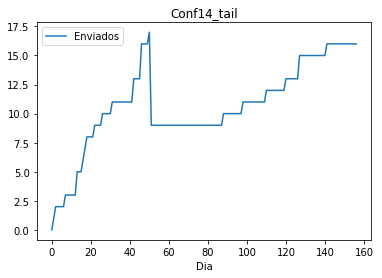

In [423]:
### Curvas test ####

filepath = "../datasets-tfg/conferencias v1/test/curvas/csv curvas/"
filepath1 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/"
filepath2 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/"
filepath3 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas/"
filepath4 = "../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas (eje x)/"

mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")   
n = len(mapa_curv) #número de archivos en la carpeta

for i in range (0, n): #En el in range no entra el último
    filename = str(mapa_curv["NombreCurva"][i]) + ".csv"
    file = os.path.join(filepath, filename)
    
    temp_data = pd.read_csv(file)
    
    if mapa_curv["Escalon"][i]==1:
        drop = temp_data[temp_data["Enviados"]<=int(temp_data["Enviados"][len(temp_data)-1]*0.05)].index
        temp_data = temp_data.drop(drop)
        temp_data = temp_data.reset_index(drop=True) 
    
    size = temp_data.shape
    rows = size[0]
    
    Enviados = temp_data["Enviados"]
    Dia = list(range(0, rows))
    
    FactorX = 100/(rows-1)
    Offset = 0-temp_data["Enviados"][0]
    if (temp_data["Enviados"][rows-1]+Offset != 0):
        FactorY = 100/(temp_data["Enviados"][rows-1]+Offset)
    else:
        FactorY = 100
    
    EnviadosOffset = Enviados+Offset
    EnviadosEsc = (Enviados+Offset)*FactorY
    if np.all(EnviadosEsc==0):
        EnviadosEsc = EnviadosEsc + 100
    Diav = np.asarray(Dia)
    DiaEsc = Diav*FactorX
    
    data = pd.DataFrame(columns=('Dia', 'Enviados'))
    data1 = pd.DataFrame(columns=('Dia', 'Enviados'))
    for j in range (0, rows):
        data.loc[len(data)]=[DiaEsc[j], EnviadosEsc[j]] 
        data1.loc[len(data1)]=[Dia[j], EnviadosOffset[j]] 
    data.to_csv(filepath1 + str(mapa_curv["NombreCurva"][i])  + ".csv", index=False)
    data1.to_csv(filepath2 + str(mapa_curv["NombreCurva"][i])  + ".csv", index=False)
    
    %matplotlib inline
    data.plot(x="Dia", y="Enviados")
    plt.title(str(mapa_curv["NombreCurva"][i])) 
    plt.savefig(filepath3 + str(mapa_curv["NombreCurva"][i]) + ".jpg")
    
    %matplotlib inline
    data1.plot(x="Dia", y="Enviados")
    plt.title(str(mapa_curv["NombreCurva"][i])) 
    plt.savefig(filepath4 + str(mapa_curv["NombreCurva"][i]) + ".jpg")


# 4. Clustering

In [424]:
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
import shutil

In [425]:
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath1 = "../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/"

mapa_conf_train = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")
mapa_conf_test = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")

dataframe = pd.DataFrame(columns=('NombreCurva','TrainOrTest','1'))

for i in range (0, len(mapa_conf_train)):
    if mapa_conf_train["Escalon"][i]!=-1:
        filename = str(mapa_conf_train["NombreCurva"][i]) + ".csv"
        file = os.path.join(filepath, filename)
        
        curva_esc = pd.read_csv(file)
        
        index=len(curva_esc)/20
        dataframe.loc[len(dataframe)]=[mapa_conf_train["NombreCurva"][i], "train",  100-curva_esc["Enviados"][round(16*index)]]  

for i in range (0, len(mapa_conf_test)):
    if mapa_conf_test["Escalon"][i]!=-1:
        filename = str(mapa_conf_test["NombreCurva"][i]) + ".csv"
        file = os.path.join(filepath1, filename)
        
        curva_esc = pd.read_csv(file)
        
        index=len(curva_esc)/20
        dataframe.loc[len(dataframe)]=[mapa_conf_test["NombreCurva"][i], "test", 100-curva_esc["Enviados"][round(16*index)]]  


dataframe

#%matplotlib inline
#dataframe.plot(x="NombreCurva", y="1")

,NombreCurva,TrainOrTest,1
0,Conf0_C1,train,74.436090
1,Conf1_C1,train,67.521368
2,Conf2_C1,train,60.309278
3,Conf3_C1,train,80.454545
4,Conf3_C2,train,65.600000
5,Conf3_C3,train,58.461538
6,Conf4_C1,train,46.902655
7,Conf4_C2,train,78.139535
8,Conf5_C1,train,64.000000
9,Conf5_C2,train,75.000000


In [426]:
round(index)*18

18

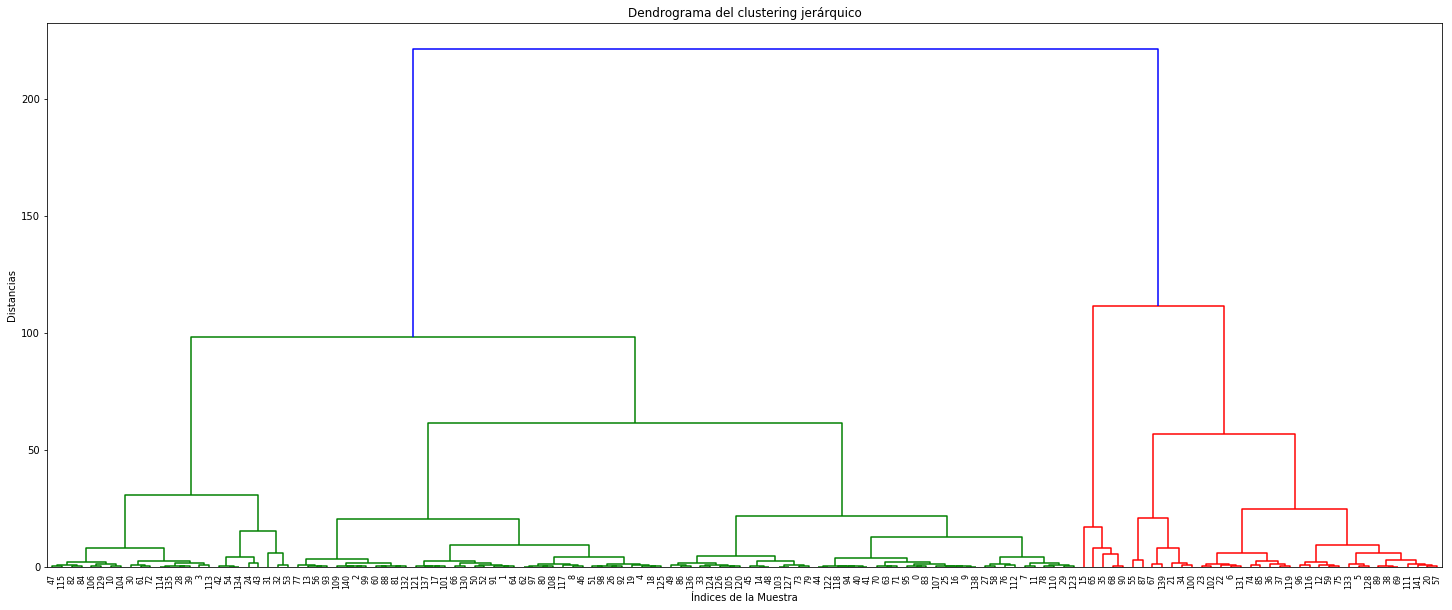

In [427]:
df = dataframe.drop(columns=['NombreCurva', 'TrainOrTest'])
Z = linkage(df, "ward")
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0)
plt.show()

[221.49135813 111.33402825  98.22836642  61.57952376  56.75981441
  30.63223184  24.73062848  21.68893638  20.67494181  20.50489064]


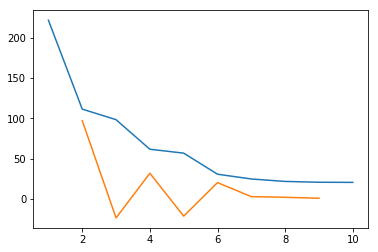

El número óptimo de cluster es 2


In [428]:
#método del codo
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [429]:
#Recuperamos los clusters y sus elementos
k=2
clusters = fcluster(Z, k, criterion="maxclust")
clusters

array([1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 2], dtype=int32)

In [430]:
clusters=np.zeros(len(dataframe))
clusters=np.int32(clusters)
for i in range (0, len(dataframe)):
    if dataframe["1"][i]<=75:
        clusters[i]=1
    else:
        clusters[i]=2
clusters

array([1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1])

In [431]:
mainpath = "../datasets-tfg/conferencias v1/entrenamiento/curvas"
mainpath0 = "../datasets-tfg/conferencias v1/test/curvas"
mainpath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering"
mainpath2 = "../datasets-tfg/conferencias v1/test/curvas/clustering"

mapa_conf_train["Cluster"]=0
mapa_conf_test["Cluster"]=0

#Creamos la carpeta graficas clustering
fullpath = os.path.join(mainpath, "clustering")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas clustering
fullpath = os.path.join(mainpath0, "clustering")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/clustering')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

k=2
for j in range (0, k+1):
    if j==0:
        
        fullpath = os.path.join(mainpath1, "csv tail")
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv tail')
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath1, "graficas tail")
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas tail')
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath2, "csv tail")
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/clustering/csv tail')
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath2, "graficas tail")
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/clustering/graficas tail')
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
    else:
        
        fullpath = os.path.join(mainpath1, "csv cluster " + str(j))
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv cluster ' + str(j))
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath1, "graficas cluster " + str(j))
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas cluster ' + str(j))
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath2, "csv cluster " + str(j))
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/clustering/csv cluster ' + str(j))
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
        fullpath = os.path.join(mainpath2, "graficas cluster " + str(j))
        fileExists = os.path.isdir('../datasets-tfg/conferencias v1/test/curvas/clustering/graficas cluster ' + str(j))
        if fileExists == True:
            rmtree(fullpath)
        os.makedirs(fullpath)
        
for i in range(0, len(mapa_conf_train)):
    
    if mapa_conf_train["Escalon"][i]==-1:
        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.csv'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.csv', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv tail')
        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.jpg'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.jpg', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas tail')
   
    else: 
        
        mapa_conf_train["Cluster"][i]=clusters[dataframe[dataframe["NombreCurva"]==mapa_conf_train["NombreCurva"][i]].index][0]
        
        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.csv'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.csv', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv cluster ' + str(clusters[dataframe[dataframe["NombreCurva"]==mapa_conf_train["NombreCurva"][i]].index][0]))
        if os.path.exists('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.jpg'):  
            shutil.copy('../datasets-tfg/conferencias v1/entrenamiento/curvas/graficas curvas escaladas/' + mapa_conf_train["NombreCurva"][i] + '.jpg', '../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/graficas cluster ' + str(clusters[dataframe[dataframe["NombreCurva"]==mapa_conf_train["NombreCurva"][i]].index][0]))
       

    
for i in range(0, len(mapa_conf_test)):
    if mapa_conf_test["Escalon"][i]==-1:
        if os.path.exists('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.csv'):  
            shutil.copy('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.csv', '../datasets-tfg/conferencias v1/test/curvas/clustering/csv tail')
        if os.path.exists('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.jpg'):  
            shutil.copy('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.jpg', '../datasets-tfg/conferencias v1/test/curvas/clustering/graficas tail')
   
    else: 
        
        mapa_conf_test["Cluster"][i]=clusters[dataframe[dataframe["NombreCurva"]==mapa_conf_test["NombreCurva"][i]].index][0]

        if os.path.exists('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.csv'):  
            shutil.copy('../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.csv', '../datasets-tfg/conferencias v1/test/curvas/clustering/csv cluster ' + str(clusters[dataframe[dataframe["NombreCurva"]==mapa_conf_test["NombreCurva"][i]].index][0]))
        if os.path.exists('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.jpg'):  
            shutil.copy('../datasets-tfg/conferencias v1/test/curvas/graficas curvas escaladas/' + mapa_conf_test["NombreCurva"][i] + '.jpg', '../datasets-tfg/conferencias v1/test/curvas/clustering/graficas cluster ' + str(clusters[dataframe[dataframe["NombreCurva"]==mapa_conf_test["NombreCurva"][i]].index][0]))
       
            
mapa_conf_train.to_csv('../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa curvas clusters.csv', index=False)               
mapa_conf_test.to_csv('../datasets-tfg/conferencias v1/test/curvas/Mapa curvas clusters.csv', index=False)


C:\Users\carmengarut\Anaconda3\lib\site-packages\ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\carmengarut\Anaconda3\lib\site-packages\ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# 5. Modelización de las curvas

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # importamos el cálculo del error cuadrático medio (MSE)

In [3]:
mainpath = "../datasets-tfg/conferencias v1"
mainpath1 = "../datasets-tfg/conferencias v1/resultado"

#Creamos la carpeta graficas resultado
fullpath = os.path.join(mainpath, "resultado")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas modelos curvas
fullpath = os.path.join(mainpath1, "graficas modelos")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas modelos')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,18.0,45,27.0,0.600000
1,0,1,2/5,27.0,45,18.0,0.400000
2,0,1,3/5,13.0,45,32.0,0.711111
3,0,1,4/5,20.0,45,25.0,0.555556
4,0,2,1/5,33.0,118,85.0,0.720339
5,0,2,2/5,74.0,118,44.0,0.372881
6,0,2,3/5,33.0,118,85.0,0.720339
7,0,2,4/5,29.0,118,89.0,0.754237
8,0,-1,1/5,54.0,41,13.0,0.317073
9,0,-1,2/5,44.0,41,3.0,0.073171


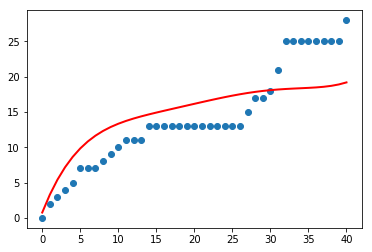

In [401]:
def entrenar_modelo(grado, x, x_test, y, y_test):
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree = grado)
            
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
            
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
            
    #Entreno el modelo
    pr.fit(x_train_poli, y)
            
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
            
    R2 = pr.score(x_test_poli, y_test)
    mse = mean_squared_error(y_true = y_test, y_pred = y_pred_pr)
    return y_pred_pr, R2, mse

from statistics import *
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv cluster 1/"
filepath1 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv cluster 2/"
filepath12 ="../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv cluster 3/"
filepath0 = "../datasets-tfg/conferencias v1/entrenamiento/curvas/clustering/csv tail/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/"
mainpath = "../datasets-tfg/conferencias v1/resultado"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")
mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa curvas clusters.csv")
#result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'Mse','Rmse','R2'))
result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'ErrorRel'))

d = len(mapa_conf)
for j in range (0, d):

    for k in range (1, mapa_conf["Numero escalones"][j] + 1):
        
        if k!=mapa_conf["Numero escalones"][j]:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_C" + str(k) + ".csv")
        else:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_tail.csv")
       
        ndias=len(prueba)
        
        #Estos datos los usaremos para comprobar el modelo elegido
        x_test1= np.arange(0,ndias,1)
        x_test1 = x_test1[:, np.newaxis]
        y_test1 = prueba["Enviados"]
            
        mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa curvas clusters.csv")
        n=len(mapa)
                      
        #mse=[]
        #rmse=[]
        #coefR2=[]  
        i=0
        x=0
        y=0
        flag=0
        R2_aux=0
        mse_aux=0
        
        cluster = mapa_curv["Cluster"][mapa_curv[mapa_curv["NombreCurva"]=="Conf" + str(j) + "_C" + str(k)].index]
        cluster = cluster.reset_index(drop=True)   
        
        
        while i<n:
            
            flag2=0
            
            if k!=mapa_conf["Numero escalones"][j]:
               # if mapa["Escalon"][i]==k:
                if cluster[0]==1:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    if os.path.exists(file):
                        temp_data = pd.read_csv(file)
                        temp_data = temp_data.dropna()
                        temp_data = temp_data.reset_index(drop=True)
                        flag2=1
                        
                elif cluster[0]==2: 
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath1, filename)
                    if os.path.exists(file):
                        temp_data = pd.read_csv(file)
                        temp_data = temp_data.dropna()
                        temp_data = temp_data.reset_index(drop=True)
                        flag2=1
                            
                elif cluster[0]==3: 
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath12, filename)
                    if os.path.exists(file):
                        temp_data = pd.read_csv(file)
                        temp_data = temp_data.dropna()
                        temp_data = temp_data.reset_index(drop=True)
                        flag2=1
                    
                if flag2==1:
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
                        
            else:
                
                if mapa["Escalon"][i]==-1:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath0, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.replace([np.inf, -np.inf], np.nan).dropna()
                    temp_data = temp_data.reset_index(drop=True)
            
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
            
            i=i+1
        
        x=x/100*ndias
        x = x[:, np.newaxis]
        grado=5
        
        for l in range (1, 5):
            
            #Estos datos los usaremos para elegir el modelo que mejor se ajuste
            x_test= np.arange(0,round(l*ndias/5),1)
            drop= np.arange(round(l*ndias/5),ndias,1)
            prueba1 = prueba.drop(drop)
            if np.all(x_test==0):
                x_test = np.arange(0, 1, 1)
                drop= np.arange(1,ndias,1)
                prueba1 = prueba.drop(drop)
            x_test = x_test[:, np.newaxis]
            y_test = prueba1["Enviados"]
            
            matrizR2 = np.zeros(shape=(n,6))
            R2=[]
            mse=[]
        
            h=0
            while h<1200:
                y1=y/100*h
                m=len(y)
                
                y_pred_pr, R2_aux, mse_aux = entrenar_modelo(grado, x, x_test, y1, y_test)
                R2.append(R2_aux)
                mse.append(mse_aux)
                
                h=h+1
                
            msep=abs(mse[0])
            escala=0
            
            for a in range (1, len(mse)):
                if abs(mse[a])<msep:
                    msep=abs(mse[a])
                    escala=a+0
        
            #R2p=0
            #escala=0
            #for a in range (0, len(R2)):
            #    if R2[a]>R2p:
            #        R2p=R2[a]
            #        escala=a+0
        
            #if escala==0:
            #    R2p=abs(R2[0])
            #    escala=0
            #    for a in range (0, len(R2)):
            #        if abs(R2[a])<R2p:
            #            R2p=abs(R2[a])
            #            escala=a+0
          
        #x_test=np.arange(0,ndias,1)
        #x_test = x_test[:, np.newaxis]
        
            y1=y/100*escala
        
            #Se define el grado del polinomio
            poli_reg = PolynomialFeatures(degree =grado)
        
            #Se transforma las características existentes en características de mayor grado
            x_train_poli = poli_reg.fit_transform(x)
            x_test_poli = poli_reg.fit_transform(x_test1)
        
            #Defino el algoritmo a utilizar
            pr = LinearRegression()
        
            #Entreno el modelo
            pr.fit(x_train_poli, y1)
        
            #Realizo una predicción
            y_pred_pr = pr.predict(x_test_poli)
        
            #c0 = pr.intercept_
            #c1 = pr.coef_[1]
        
            #if grado>1:
                #c2 = pr.coef_[2]
                #if grado>2:
                    #c3 = pr.coef_[3]
                    #if grado>3:
                        #c4 = pr.coef_[4]
                        #if grado>4:
                            #c5 = pr.coef_[5]
                            #if grado>5:
                                #c6 = pr.coef_[6]
                                
            # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
            #mse.append(mean_squared_error(y_true = y_test1, y_pred = y_pred_pr))         

            # La raíz cuadrada del MSE es el RMSE
            #rmse.append(np.sqrt(mse[l-1]))
                      
            #coefR2.append(pr.score(x_test_poli, y_test1))   
            if k!=mapa_conf["Numero escalones"][j]:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_C" + str(k)]
            else:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_tail"]
            
            mapa_curv1 = mapa_curv1.reset_index(drop=True)
            #result.loc[len(result)]=[str(j), str(k), str(l), escala, mapa_curv1["EnviadosTotales"][0], escala-mapa_curv1["EnviadosTotales"][0], mse[l-1], rmse[l-1], coefR2[l-1]]   
            if k!=mapa_conf["Numero escalones"][j]:
                result.loc[len(result)]=[str(j), str(k), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
            else:
                result.loc[len(result)]=[str(j), str(-1), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
           
            %matplotlib inline
            plt.scatter(x_test1, y_test1)
            plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
            
            if k!=mapa_conf["Numero escalones"][j]:
                plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(escala)  )
            else:
                plt.savefig(filepath3 + "Conf " + str(j) + " Tail " + str(l) + "%5" + " Escala " + str(escala)  )
           
        
result.to_csv(filepath3 + "Resultado.csv", index=False)
result

In [108]:
plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala "   )plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala "   )

<Figure size 432x288 with 0 Axes>

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,55.0,34.0,21.0,0.617647
1,0,1,2/5,31.0,34.0,3.0,0.088235
2,0,1,3/5,21.0,34.0,13.0,0.382353
3,0,1,4/5,15.0,34.0,19.0,0.558824
4,0,2,1/5,77.0,55.0,22.0,0.400000
5,0,2,2/5,53.0,55.0,2.0,0.036364
6,0,2,3/5,37.0,55.0,18.0,0.327273
7,0,2,4/5,29.0,55.0,26.0,0.472727
8,0,-1,1/5,10.0,22.0,12.0,0.545455
9,0,-1,2/5,11.0,22.0,11.0,0.500000


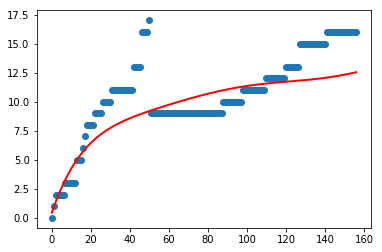

In [4]:
#Cppia que funciona sin clustering y cogiendo solo el tramo actual
def entrenar_modelo(grado, x, x_test, y, y_test):
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree = grado)
            
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
            
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
            
    #Entreno el modelo
    pr.fit(x_train_poli, y)
            
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
            
    R2 = pr.score(x_test_poli, y_test)
    mse = mean_squared_error(y_true = y_test, y_pred = y_pred_pr)
    
    return y_pred_pr, R2, mse

from statistics import *
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/"
mainpath = "../datasets-tfg/conferencias v1/resultado"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")
mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")
#result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'Mse','Rmse','R2'))
result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'ErrorRel'))

d = len(mapa_conf)
for j in range (0, d):
#for j in range (6, 7):

    for k in range (1, mapa_conf["Numero escalones"][j] + 1):
    #for k in range (mapa_conf["Numero escalones"][j], mapa_conf["Numero escalones"][j] + 1):
        
        if k!=mapa_conf["Numero escalones"][j]:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_C" + str(k) + ".csv")
        else:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_tail.csv")
       
        ndias=len(prueba)
        
        #Estos datos los usaremos para comprobar el modelo elegido
        x_test1= np.arange(0,ndias,1)
        x_test1 = x_test1[:, np.newaxis]
        y_test1 = prueba["Enviados"]
            
        mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")
        n=len(mapa)
                      
        #mse=[]
        #rmse=[]
        #coefR2=[]  
        i=0
        x=0
        y=0
        flag=0
        R2_aux=0
        mse_aux=0
        while i<n:
            
            if k!=mapa_conf["Numero escalones"][j]:
                if mapa["Escalon"][i]==k:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.reset_index(drop=True)
            
            
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
                        
            else:
                
                if mapa["Escalon"][i]==-1:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.replace([np.inf, -np.inf], np.nan).dropna()
                    temp_data = temp_data.reset_index(drop=True)
                    
            
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
            
            i=i+1
        
        x=x/100*ndias
        x = x[:, np.newaxis]
        grado=6
        
        for l in range (1, 5):
        #for l in range (4, 5):
            
            #Estos datos los usaremos para elegir el modelo que mejor se ajuste
            x_test= np.arange(0,round(l*ndias/5),1)
            drop= np.arange(round(l*ndias/5),ndias,1)
            prueba1 = prueba.drop(drop)
            if np.all(x_test==0):
                x_test = np.arange(0, 1, 1)
                drop= np.arange(1,ndias,1)
                prueba1 = prueba.drop(drop)
            x_test = x_test[:, np.newaxis]
            y_test = prueba1["Enviados"]
            
            matrizR2 = np.zeros(shape=(n,6))
            R2=[]
            mse=[]
        
            h=0
            while h<1200:
                y1=y/100*h
                m=len(y)
                
                y_pred_pr, R2_aux, mse_aux = entrenar_modelo(grado, x, x_test, y1, y_test)
                R2.append(R2_aux)
                mse.append(mse_aux)
                
                ###borrraaaaar
                #%matplotlib inline
                #plt.scatter(x_test1, y_test1, color='green')
                #plt.scatter(x_test1, y_test1)
                #plt.plot(x_test, y_pred_pr, color='red', linewidth=2)
                #plt.savefig(filepath4 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(h)  )
                #### hasta aqui
                
                h=h+1
        
            msep=abs(mse[0])
            escala=0
            
            for a in range (1, len(mse)):
                if abs(mse[a])<msep:
                    msep=abs(mse[a])
                    escala=a+0

                        
            #for a in range (0, len(R2)):
                #if R2[a]>R2p:
                    #R2p=R2[a]
                    #escala=a+0
        
            #if escala==0:
                #R2p=abs(R2[0])
                #escala=0
                #for a in range (0, len(R2)):
                    #if abs(R2[a])<R2p:
                        #R2p=abs(R2[a])
                        #escala=a+0
                
        #x_test=np.arange(0,ndias,1)
        #x_test = x_test[:, np.newaxis]
        
            y1=y/100*escala
        
            #Se define el grado del polinomio
            poli_reg = PolynomialFeatures(degree =grado)
        
            #Se transforma las características existentes en características de mayor grado
            x_train_poli = poli_reg.fit_transform(x)
            x_test_poli = poli_reg.fit_transform(x_test1)
        
            #Defino el algoritmo a utilizar
            pr = LinearRegression()
        
            #Entreno el modelo
            pr.fit(x_train_poli, y1)
        
            #Realizo una predicción
            y_pred_pr = pr.predict(x_test_poli)
        
            #c0 = pr.intercept_
            #c1 = pr.coef_[1]
        
            #if grado>1:
                #c2 = pr.coef_[2]
                #if grado>2:
                    #c3 = pr.coef_[3]
                    #if grado>3:
                        #c4 = pr.coef_[4]
                        #if grado>4:
                            #c5 = pr.coef_[5]
                            #if grado>5:
                                #c6 = pr.coef_[6]
                                
            # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
            #mse.append(mean_squared_error(y_true = y_test1, y_pred = y_pred_pr))         

            # La raíz cuadrada del MSE es el RMSE
            #rmse.append(np.sqrt(mse[l-1]))
                      
            #coefR2.append(pr.score(x_test_poli, y_test1))   
            if k!=mapa_conf["Numero escalones"][j]:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_C" + str(k)]
            else:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_tail"]
            
            mapa_curv1 = mapa_curv1.reset_index(drop=True)
            #result.loc[len(result)]=[str(j), str(k), str(l), escala, mapa_curv1["EnviadosTotales"][0], escala-mapa_curv1["EnviadosTotales"][0], mse[l-1], rmse[l-1], coefR2[l-1]]   
            if k!=mapa_conf["Numero escalones"][j]:
                result.loc[len(result)]=[str(j), str(k), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
            else:
                result.loc[len(result)]=[str(j), str(-1), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
           
            %matplotlib inline
            plt.scatter(x_test1, y_test1)
            plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
            
            if k!=mapa_conf["Numero escalones"][j]:
                plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(escala)  )
            else:
                plt.savefig(filepath3 + "Conf " + str(j) + " Tail " + str(l) + "%5" + " Escala " + str(escala)  )
           
        
result.to_csv(filepath3 + "Resultado.csv", index=False)
result

[0.23897925162788636]

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,55.0,34.0,21.0,0.617647
1,0,1,2/5,31.0,34.0,3.0,0.088235
2,0,1,3/5,21.0,34.0,13.0,0.382353
3,0,1,4/5,15.0,34.0,19.0,0.558824
4,0,2,1/5,77.0,55.0,22.0,0.400000
5,0,2,2/5,53.0,55.0,2.0,0.036364
6,0,2,3/5,37.0,55.0,18.0,0.327273
7,0,2,4/5,29.0,55.0,26.0,0.472727
8,0,-1,1/5,10.0,22.0,12.0,0.545455
9,0,-1,2/5,11.0,22.0,11.0,0.500000


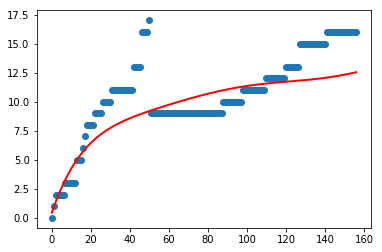

In [433]:
#sin clustering
def entrenar_modelo(grado, x, x_test, y, y_test):
    #Se define el grado del polinomio
    poli_reg = PolynomialFeatures(degree = grado)
            
    #Se transforma las características existentes en características de mayor grado
    x_train_poli = poli_reg.fit_transform(x)
    x_test_poli = poli_reg.fit_transform(x_test)
            
    #Defino el algoritmo a utilizar
    pr = LinearRegression()
            
    #Entreno el modelo
    pr.fit(x_train_poli, y)
            
    #Realizo una predicción
    y_pred_pr = pr.predict(x_test_poli)
            
    R2 = pr.score(x_test_poli, y_test)
    #mse = mean_squared_error(y_true = y_test, y_pred = y_pred_pr)
    return y_pred_pr, R2

from statistics import *
#Declaramos los paths que vamos a usar
filepath = "../datasets-tfg/conferencias v1/entrenamiento/curvas/csv curvas escaladas/"
filepath2= "../datasets-tfg/conferencias v1/curvas/"
filepath3 = "../datasets-tfg/conferencias v1/resultado/"
mainpath = "../datasets-tfg/conferencias v1/resultado"

mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")
mapa_curv = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa.csv")
#result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'Mse','Rmse','R2'))
result = pd.DataFrame(columns=('Conferencia','Escalon','LongTramo','EnviadosCalculados','EnviadosReales', 'ErrorAbs', 'ErrorRel'))

d = len(mapa_conf)
for j in range (0, d):

    for k in range (1, mapa_conf["Numero escalones"][j] + 1):
        
        if k!=mapa_conf["Numero escalones"][j]:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_C" + str(k) + ".csv")
        else:
            prueba = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/csv curvas escaladas (eje x)/Conf" + str(j) + "_tail.csv")
       
        ndias=len(prueba)
        
        #Estos datos los usaremos para comprobar el modelo elegido
        x_test1= np.arange(0,ndias,1)
        x_test1 = x_test1[:, np.newaxis]
        y_test1 = prueba["Enviados"]
            
        mapa = pd.read_csv("../datasets-tfg/conferencias v1/entrenamiento/curvas/Mapa.csv")
        n=len(mapa)
                      
        #mse=[]
        #rmse=[]
        #coefR2=[]  
        i=0
        x=0
        y=0
        flag=0
        R2_aux=0
        while i<n:
            
            if k!=mapa_conf["Numero escalones"][j]:
                if mapa["Escalon"][i]==k:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.reset_index(drop=True)
                    
            
            #   if ["Escalon"][i]==k:
            #       if i==0:
            #           y = temp_data["Enviados"]
            #           x = temp_data["Dia"]
            #       else: 
            #           y = np.append(y,temp_data["Enviados"])
            #           x = np.append(x,temp_data["Dia"])
            
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
                        
            else:
                
                if mapa["Escalon"][i]==-1:
                    filename = mapa["NombreCurva"][i] + '.csv'
                    file = os.path.join(filepath, filename)
                    
                    temp_data = pd.read_csv(file)
                    temp_data = temp_data.dropna()
                    temp_data = temp_data.replace([np.inf, -np.inf], np.nan).dropna()
                    temp_data = temp_data.reset_index(drop=True)
                    
            
            #   if ["Escalon"][i]==k:
            #       if i==0:
            #           y = temp_data["Enviados"]
            #           x = temp_data["Dia"]
            #       else: 
            #           y = np.append(y,temp_data["Enviados"])
            #           x = np.append(x,temp_data["Dia"])
            
                    if flag==0:
                        y = temp_data["Enviados"]
                        x = temp_data["Dia"]
                        flag=1
                    else: 
                        y = np.append(y,temp_data["Enviados"])
                        x = np.append(x,temp_data["Dia"])
            
            i=i+1
        
        x=x/100*ndias
        x = x[:, np.newaxis]
        grado=6
        
        for l in range (1, 5):
            
            #Estos datos los usaremos para elegir el modelo que mejor se ajuste
            x_test= np.arange(0,round(l*ndias/5),1)
            drop= np.arange(round(l*ndias/5),ndias,1)
            prueba1 = prueba.drop(drop)
            if np.all(x_test==0):
                x_test = np.arange(0, 1, 1)
                drop= np.arange(1,ndias,1)
                prueba1 = prueba.drop(drop)
            x_test = x_test[:, np.newaxis]
            y_test = prueba1["Enviados"]
            
            matrizR2 = np.zeros(shape=(n,6))
            R2=[]
        
            h=0
            while h<1200:
                y1=y/100*h
                m=len(y)
                
                y_pred_pr, R2_aux = entrenar_modelo(grado, x, x_test, y1, y_test)
                R2.append(R2_aux)
                
                h=h+1
        
            R2p=0
            escala=0
            for a in range (0, len(R2)):
                if R2[a]>R2p:
                    R2p=R2[a]
                    escala=a+0
        
            if escala==0:
                R2p=abs(R2[0])
                escala=0
                for a in range (0, len(R2)):
                    if abs(R2[a])<R2p:
                        R2p=abs(R2[a])
                        escala=a+0
                
        #x_test=np.arange(0,ndias,1)
        #x_test = x_test[:, np.newaxis]
        
            y1=y/100*escala
        
            #Se define el grado del polinomio
            poli_reg = PolynomialFeatures(degree =grado)
        
            #Se transforma las características existentes en características de mayor grado
            x_train_poli = poli_reg.fit_transform(x)
            x_test_poli = poli_reg.fit_transform(x_test1)
        
            #Defino el algoritmo a utilizar
            pr = LinearRegression()
        
            #Entreno el modelo
            pr.fit(x_train_poli, y1)
        
            #Realizo una predicción
            y_pred_pr = pr.predict(x_test_poli)
        
            #c0 = pr.intercept_
            #c1 = pr.coef_[1]
        
            #if grado>1:
                #c2 = pr.coef_[2]
                #if grado>2:
                    #c3 = pr.coef_[3]
                    #if grado>3:
                        #c4 = pr.coef_[4]
                        #if grado>4:
                            #c5 = pr.coef_[5]
                            #if grado>5:
                                #c6 = pr.coef_[6]
                                
            # Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
            #mse.append(mean_squared_error(y_true = y_test1, y_pred = y_pred_pr))         

            # La raíz cuadrada del MSE es el RMSE
            #rmse.append(np.sqrt(mse[l-1]))
                      
            #coefR2.append(pr.score(x_test_poli, y_test1))   
            if k!=mapa_conf["Numero escalones"][j]:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_C" + str(k)]
            else:
                mapa_curv1=mapa_curv[mapa_curv.NombreCurva == "Conf" + str(j) + "_tail"]
            
            mapa_curv1 = mapa_curv1.reset_index(drop=True)
            #result.loc[len(result)]=[str(j), str(k), str(l), escala, mapa_curv1["EnviadosTotales"][0], escala-mapa_curv1["EnviadosTotales"][0], mse[l-1], rmse[l-1], coefR2[l-1]]   
            if k!=mapa_conf["Numero escalones"][j]:
                result.loc[len(result)]=[str(j), str(k), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
            else:
                result.loc[len(result)]=[str(j), str(-1), str(l) + "/5", round(y_pred_pr[len(y_pred_pr)-1]), mapa_curv1["EnviadosTotales"][0], abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0]), abs(round(y_pred_pr[len(y_pred_pr)-1])-mapa_curv1["EnviadosTotales"][0])/mapa_curv1["EnviadosTotales"][0] ]
           
            %matplotlib inline
            plt.scatter(x_test1, y_test1)
            plt.plot(x_test1, y_pred_pr, color='red', linewidth=2)
            
            if k!=mapa_conf["Numero escalones"][j]:
                plt.savefig(filepath3 + "Conf " + str(j) + " Escalon " + str(k) + " " + str(l) + "%5" + " Escala " + str(escala)  )
            else:
                plt.savefig(filepath3 + "Conf " + str(j) + " Tail " + str(l) + "%5" + " Escala " + str(escala)  )
           
        
result.to_csv(filepath3 + "Resultado.csv", index=False)
result

In [5]:
result2 = pd.DataFrame(columns=('Conferencia','Tramo','Error Relativo Medio', "EnviadosCalculados", "EnviadosReales", "Error Relativo"))
for i in range (0,d):
    errorr_medio = []
    enviados_pred = []
    enviados_reales = []
    for j in range (1,5):
        result1 = result[result.Conferencia == str(i)]
        result1 = result1[result1.LongTramo == (str(j) + "/5")]
        enviados_pred.append(sum(result1["EnviadosCalculados"]))
        enviados_reales.append(sum(result1["EnviadosReales"]))
        result1 = result1[result1.Escalon != str(-1)]
        errorr_medio.append(result1["ErrorRel"].mean())
        result2.loc[len(result2)]=[str(i), str(j) + "/5", errorr_medio[j-1], enviados_pred[j-1], enviados_reales[j-1], abs(enviados_reales[j-1]-enviados_pred[j-1])/enviados_reales[j-1]]  
result2

,Conferencia,Tramo,Error Relativo Medio,EnviadosCalculados,EnviadosReales,Error Relativo
0,0,1/5,0.508824,142.0,111.0,0.279279
1,0,2/5,0.062299,95.0,111.0,0.144144
2,0,3/5,0.354813,70.0,111.0,0.369369
3,0,4/5,0.515775,58.0,111.0,0.477477
4,1,1/5,0.380719,230.0,242.0,0.049587
5,1,2/5,0.207750,193.0,242.0,0.202479
6,1,3/5,0.291083,176.0,242.0,0.272727
7,1,4/5,0.271242,177.0,242.0,0.268595
8,2,1/5,0.078947,276.0,261.0,0.057471
9,2,2/5,0.114035,283.0,261.0,0.084291


In [6]:
mainpath = "../datasets-tfg/conferencias v1/resultado"
mainpath1 = "../datasets-tfg/conferencias v1/resultado/graficas error relativo"
#Creamos la carpeta graficas error relativo
fullpath = os.path.join(mainpath, "graficas error relativo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas error relativo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas error relativo
fullpath = os.path.join(mainpath1, "error de cada conferencia")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas error relativo/error de cada conferencia')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

#Creamos la carpeta graficas error relativo
fullpath = os.path.join(mainpath1, "errores de cada conferencia agrupados por escalon y tramo")
fileExists = os.path.isdir('../datasets-tfg/conferencias v1/resultado/graficas error relativo/errores de cada conferencia agrupados por escalon y tramo')
if fileExists == True:
    rmtree(fullpath)
os.makedirs(fullpath)

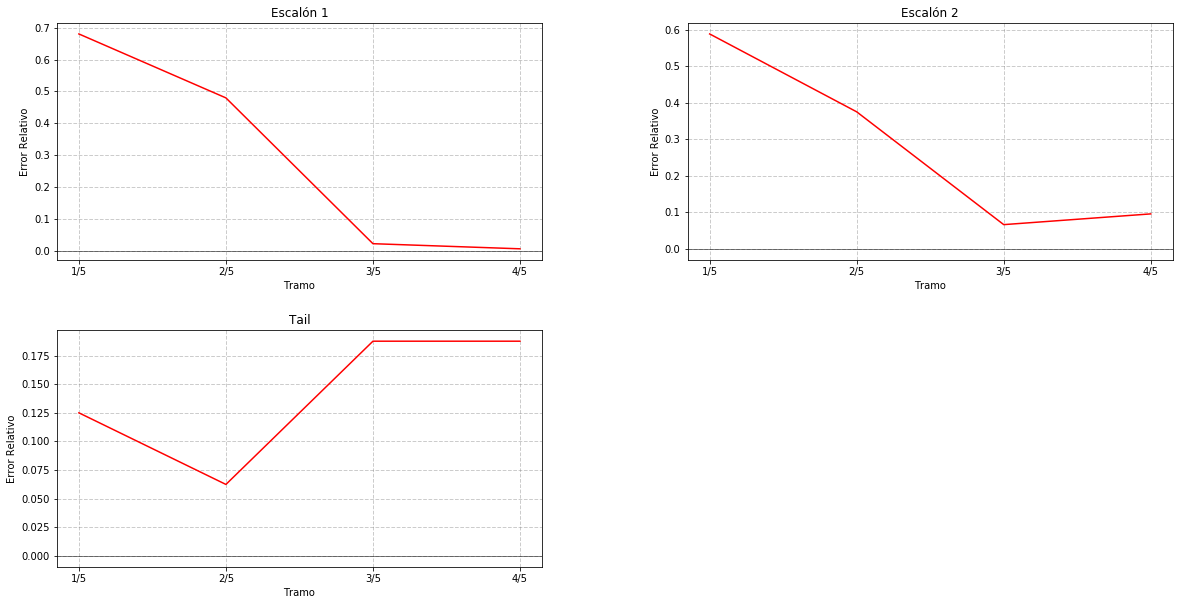

In [7]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/error de cada conferencia/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

for j in range (0, len(mapa_conf)):
    
    result1 = result[result.Conferencia == str(j)]
    %matplotlib inline
    fig1 = plt.figure("Filtro")
    fig1.set_size_inches(20, 10)
    fig1.subplots_adjust(hspace=0.3, wspace=0.3)
    
    for k in range (1, mapa_conf["Numero escalones"][j]+1):
        if k != mapa_conf["Numero escalones"][j]:
            result3 = result1[result1.Escalon == str(k)]
        else:
            result3 = result1[result1.Escalon == str(-1)]
            
        x = result3["LongTramo"]
        y = result3["ErrorRel"]
        if mapa_conf["Numero escalones"][j]<=4:
            ax = fig1.add_subplot(2, 2, k)
        else:
            ax = fig1.add_subplot(2, 3, k)
        ax.plot(x,y,"r")
        ax.set_xlabel("Tramo")
        ax.set_ylabel("Error Relativo")
        if k != mapa_conf["Numero escalones"][j]:
            ax.set_title("Escalón " + str(k))
        else: 
            ax.set_title("Tail")
        ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
        # Pintar los ejes pasando por (0,0)
        ax.axhline(0, color='black', linewidth=0.5)
        
    
    plt.savefig(filepath + "Conf " + str(j))


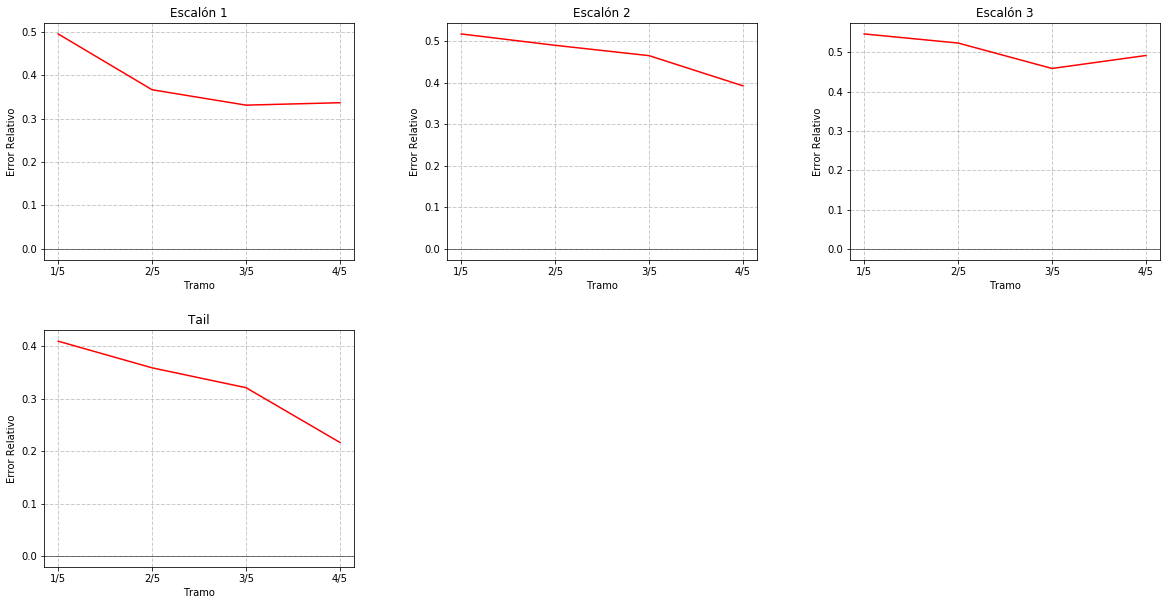

In [8]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

    
%matplotlib inline
fig1 = plt.figure("Filtro")
fig1.set_size_inches(20, 10)
fig1.subplots_adjust(hspace=0.3, wspace=0.3)
    
for k in range (1, max(mapa_conf["Numero escalones"])):
    result5 = result[result.Escalon == str(k)]
    x = ["1/5", "2/5", "3/5", "4/5"]
    y = []
    for i in range (1, 5):
        result6 = result5[result5.LongTramo == (str(i) + "/5")]
        y.append(result6["ErrorRel"].mean())
 
    ax = fig1.add_subplot(2, 3, k)
    ax.plot(x,y,"r")
    ax.set_xlabel("Tramo")
    ax.set_ylabel("Error Relativo")
    ax.set_title("Escalón " + str(k))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    # Pintar los ejes pasando por (0,0)
    ax.axhline(0, color='black', linewidth=0.5)
        
result5 = result[result.Escalon == str(-1)]
x = ["1/5", "2/5", "3/5", "4/5"]
y = []
for i in range (1, 5):
    result6 = result5[result5.LongTramo == (str(i) + "/5")]
    y.append(result6["ErrorRel"].mean())

ax = fig1.add_subplot(2, 3, k+1)
ax.plot(x,y,"r")
ax.set_xlabel("Tramo")
ax.set_ylabel("Error Relativo")
ax.set_title("Tail")
ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
# Pintar los ejes pasando por (0,0)
ax.axhline(0, color='black', linewidth=0.5)

plt.savefig(filepath + "Error Relativo Medio de cada escalon")

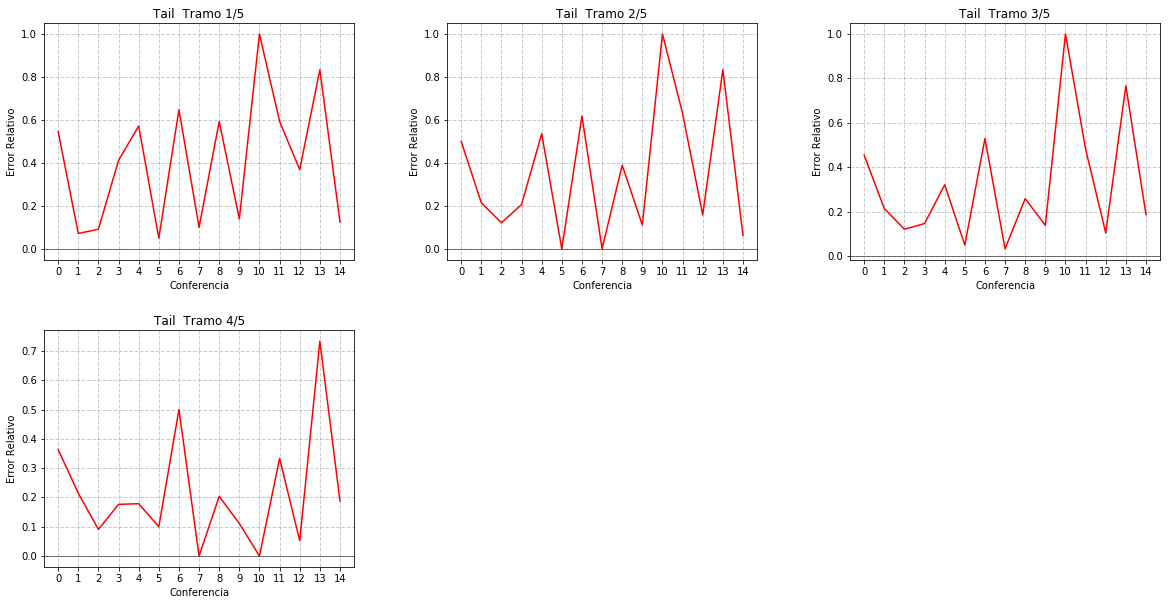

In [9]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/errores de cada conferencia agrupados por escalon y tramo/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

for k in range (1, max(mapa_conf["Numero escalones"])):
    result1 = result[result.Escalon == str(k)]
    %matplotlib inline
    fig1 = plt.figure("Filtro")
    fig1.set_size_inches(20, 10)
    fig1.subplots_adjust(hspace=0.3, wspace=0.3)
     

    for i in range (1, 5):
        result3 = result1[result1.LongTramo == (str(i) + "/5")]
        
        x = result3["Conferencia"]
        y = result3["ErrorRel"]
        ax = fig1.add_subplot(2, 3, i)
        ax.plot(x,y,"r")
        ax.set_xlabel("Conferencia")
        ax.set_ylabel("Error Relativo")
        ax.set_title("Escalón " + str(k) + " Tramo " + str(i) + "/5")
        ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
        # Pintar los ejes pasando por (0,0)
        ax.axhline(0, color='black', linewidth=0.5)
        
        
    plt.savefig(filepath + "Escalon " + str(k))
    
#Ahora la tail
result1 = result[result.Escalon == str(-1)]
%matplotlib inline
fig1 = plt.figure("Filtro")
fig1.set_size_inches(20, 10)
fig1.subplots_adjust(hspace=0.3, wspace=0.3)
 

for i in range (1, 5):
    result3 = result1[result1.LongTramo == (str(i) + "/5")]
        
    x = result3["Conferencia"]
    y = result3["ErrorRel"]
    ax = fig1.add_subplot(2, 3, i)
    ax.plot(x,y,"r")
    ax.set_xlabel("Conferencia")
    ax.set_ylabel("Error Relativo")
    ax.set_title("Tail " + " Tramo " + str(i) + "/5")
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    # Pintar los ejes pasando por (0,0)
    ax.axhline(0, color='black', linewidth=0.5)

plt.savefig(filepath + "Tail")

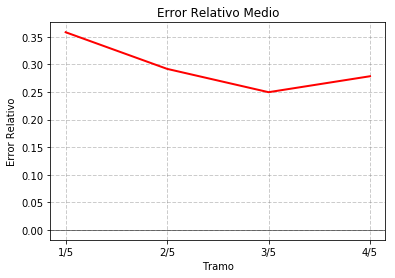

In [10]:
filepath = "../datasets-tfg/conferencias v1/resultado/graficas error relativo/"
mapa_conf = pd.read_csv("../datasets-tfg/conferencias v1/test/curvas/Mapa conferencias.csv")

    
x = ["1/5", "2/5", "3/5", "4/5"]
y = []
for i in range (1, 5):
    result4 = result2[result2.Tramo == (str(i) + "/5")]
    y.append(result4["Error Relativo"].mean())

%matplotlib inline
plt.plot(x, y, color='red', linewidth=2)
plt.xlabel("Tramo")
plt.ylabel("Error Relativo")
plt.title("Error Relativo Medio")
plt.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
# Pintar los ejes pasando por (0,0)
plt.axhline(0, color='black', linewidth=0.5)
        
    
plt.savefig(filepath + "Error Relativo Medio")


In [14]:
fileExists = os.path.isfile('../datasets-tfg/errores result.csv')
if fileExists == True:
    errores_result = pd.read_csv("../datasets-tfg/errores result.csv")
else:
    errores_result = pd.DataFrame(columns=('Intento','Error Medio Tramo 1/5','Error Medio Tramo 2/5', "Error Medio Tramo 3/5", "Error Medio Tramo 4/5", "Error Medio Total"))

    
errores_result.loc[len(errores_result)]=["Prueba 8 v8 (sin cluster) (con R2)", y[0], y[1], y[2], y[3], mean(y)] 


errores_result.to_csv("../datasets-tfg/errores result.csv", index=False)

errores_result

,Intento,Error Medio Tramo 1/5,Error Medio Tramo 2/5,Error Medio Tramo 3/5,Error Medio Tramo 4/5,Error Medio Total
0,texto aqui (sin cluster),0.701845,0.542351,0.415237,0.352474,0.436557
1,texto aqui (sin cluster),0.701845,0.542351,0.415237,0.352474,0.436557
2,texto aqui (sin cluster) cogiendo solo el tramo,0.665437,0.534453,0.387535,0.352956,0.447468
3,Prueba 8 v1 (sin cluster),0.679607,0.629326,0.558276,0.490661,0.529934
4,Prueba 8 v1 (sin cluster) cogiendo solo el tramo,0.679607,0.670873,0.580785,0.483722,0.539374
5,Prueba 8 v1 (con cluster) cogiendo solo el tramo,0.761580,0.698911,0.578379,0.442832,0.553596
6,Prueba 8 v2 (sin cluster),0.680951,0.488620,0.447809,0.402591,0.467767
7,Prueba 8 v2 (con cluster) cogiendo solo el tramo,0.666751,0.619520,0.508847,0.412224,0.531982
8,Prueba 8 v2 (sin cluster) cogiendo solo el tramo,0.666751,0.619520,0.508847,0.412224,0.508869
9,Prueba 8 v3 (sin cluster),0.627761,0.491354,0.487376,0.387705,0.437920


In [38]:

result

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,142.0,228.0,86.0,0.377193
1,0,1,2/5,232.0,228.0,4.0,0.017544
2,0,1,3/5,174.0,228.0,54.0,0.236842
3,0,1,4/5,150.0,228.0,78.0,0.342105
4,0,-1,1/5,31.0,33.0,2.0,0.060606
5,0,-1,2/5,28.0,33.0,5.0,0.151515
6,0,-1,3/5,31.0,33.0,2.0,0.060606
7,0,-1,4/5,32.0,33.0,1.0,0.030303
8,1,1,1/5,239.0,240.0,1.0,0.004167
9,1,1,2/5,540.0,240.0,300.0,1.250000


In [44]:
d

18

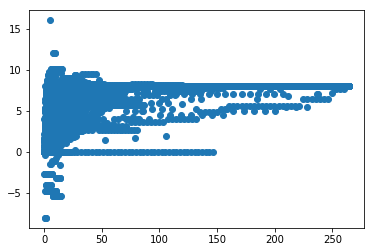

In [32]:
%matplotlib inline
plt.scatter(x, y1)

In [35]:
if any(isnan(x)):
    v=x(~isnan(x))
end

NameError: name 'isnan' is not defined

In [123]:
result["ErrorRel"].mean()

0.4241492654851835

In [158]:
result["ErrorRel"].mean()

0.4190558055155582

In [27]:
result

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,35.0,181.0,146.0,0.806630
1,0,1,2/5,96.0,181.0,85.0,0.469613
2,0,1,3/5,130.0,181.0,51.0,0.281768
3,0,1,4/5,147.0,181.0,34.0,0.187845
4,0,2,1/5,372.0,258.0,114.0,0.441860
5,0,2,2/5,458.0,258.0,200.0,0.775194
6,0,2,3/5,425.0,258.0,167.0,0.647287
7,0,2,4/5,305.0,258.0,47.0,0.182171
8,0,-1,1/5,75.0,63.0,12.0,0.190476
9,0,-1,2/5,68.0,63.0,5.0,0.079365


In [17]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [18]:
result

,Conferencia,Escalon,LongTramo,EnviadosCalculados,EnviadosReales,ErrorAbs,ErrorRel
0,0,1,1/5,29,14.0,15.0,1.071429
1,0,1,2/5,34,14.0,20.0,1.428571
2,0,1,3/5,24,14.0,10.0,0.714286
3,0,1,4/5,23,14.0,9.0,0.642857
4,0,2,1/5,20,22.0,2.0,0.090909
5,0,2,2/5,19,22.0,3.0,0.136364
6,0,2,3/5,16,22.0,6.0,0.272727
7,0,2,4/5,20,22.0,2.0,0.090909
8,0,3,1/5,28,8.0,20.0,2.500000
9,0,3,2/5,28,8.0,20.0,2.500000
